# Open Questions

In [ ]:
!pip install python-igraph
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install cairocffi
!pip uninstall pycairo
!pip install cdlib

     |████████████████████████████████| 3.2MB 8.5MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libgif-dev libpixman-1-dev
  libxcb-shm0-dev
0 upgraded, 5 newly installed, 0 to remove and 35 not upgraded.
Need to get 951 kB of archives.
After this operation, 4,084 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2ubuntu0.1 [53.5 kB]
Get:2 http://archive.ubuntu.com/ubu

In [ ]:
import pickle
import math
import igraph
import pandas as pd
import numpy as np
from igraph import *
import matplotlib.pyplot as plt
import time
import cairocffi as cairo
from google.colab import files
from IPython.display import SVG, display, Image
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
def load_obj(name):
    with open('/content/drive/My Drive/NetworkScience/AcademicGraph/data/obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

def save_obj(obj, name):
    with open('/content/drive/My Drive/NetworkScience/AcademicGraph/data/obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

#biggestSubG = load_obj("biggestSubG")

In [ ]:
g = load_obj("graph")
cits = load_obj("n_citations")
g.vs['n_citations'] = cits

In [ ]:
type(cits[0]) == int

True

### Preprocessing

In [ ]:
num = 0
new_cits = []
for cit in cits:
  if(type(cit) != int):
    new_cits.append(0)
num

0

In [ ]:
components = g.clusters(mode="weak")
biggestSubG = components.subgraph(22) # 22 = Bigger connected component index in components list

In [ ]:
num = 0

for cit in biggestSubG.vs['n_citations']:
  if(type(cit) != int):
    num += 1
num

9398

In [ ]:
num = 0

for cit in biggestSubG.vs["h_index"]:
  if(type(cit) != int):
    num += 1
num

339

In [ ]:
num = 0

for cit in biggestSubG.vs["n_pubs"]:
  if(type(cit) != int):
    num += 1
num

9398

We have 9398 null values for citations, 339 for h_index and 9398 for n_pubs

Getting indices of non null values

In [ ]:
nn = [i for i in range(len(biggestSubG.vs['n_citations'])) if type(biggestSubG.vs['n_citations'][i]) == int]

In [ ]:
nnGraph = biggestSubG.subgraph(nn)

Checking for other null values

In [ ]:
num = 0

for cit in nnGraph.vs["h_index"]:
  if(type(cit) != int):
    num += 1
num

0

In [ ]:
num = 0

for cit in nnGraph.vs["n_pubs"]:
  if(type(cit) != int):
    num += 1
num

0

We follow with our correlation analysis on nnGraph

In [ ]:
len(nnGraph.vs)

21800

## Centrality correlations

Centrality measures

In [ ]:
betwCentrality = nnGraph.betweenness()
closCentrality = nnGraph.closeness()
degrCentrality = nnGraph.degree()
eigenCentrality = nnGraph.eigenvector_centrality(directed=False, scale=True, weights=None, return_eigenvalue=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at /project/vendor/source/igraph/src/centrality.c:2856
  


In [ ]:
len(eigenCentrality)

21800

Scaling eigenvector centrality

In [ ]:
def scaleEigen(eigenvectors):
  logarithmicEigen = [math.log10(el) if el > 0 else 0 for el in eigenvectors]
  mi = min(logarithmicEigen)
  ma = max(logarithmicEigen)
  logarithmicEigen = [el - mi for el in logarithmicEigen]
  mi = min(logarithmicEigen)
  ma = max(logarithmicEigen)
  scaledEigen = [el*(float(100)/float(ma)) for el in logarithmicEigen]
  return scaledEigen

In [ ]:
closCentrality = [i*(100/max(closCentrality)) for i in closCentrality]
print(max(closCentrality))
print(min(closCentrality))

100.0
19.039257334841132


In [ ]:
def scaleDegree(degrees):
  logarithmicDegrees = [math.log10(el) if el > 0 else 0 for el in degrees]
  scaledDegrees = [el*(float(100)/float(max(logarithmicDegrees))) for el in logarithmicDegrees]
  return scaledDegrees

In [ ]:
degrCentrality = scaleDegree(degrCentrality)

In [ ]:
print(max(degrCentrality))
print(min(degrCentrality))

100.0
0.0


In [ ]:
eigenCentrality = scaleEigen(eigenCentrality)
print(max(eigenCentrality))
print(min(eigenCentrality))

100.0
0.0


In [ ]:
mean(eigenCentrality)

82.76305213842852

Saving centrality measures

In [ ]:
save_obj(betwCentrality, "nnGbetwCentrality")
save_obj(closCentrality, "nnGclosCentrality")
save_obj(degrCentrality, "nnGdegrCentrality")
save_obj(eigenCentrality, "nnGeigenCentrality")

Reading centrality measures

In [ ]:
betwCentrality = load_obj("nnGbetwCentrality")
closCentrality = load_obj("nnGclosCentrality")
degrCentrality = load_obj("nnGdegrCentrality")
eigenCentrality = load_obj("nnGeigenCentrality")

Nodes measures

In [ ]:
h_indices = nnGraph.vs["h_index"]
pubs = nnGraph.vs["n_pubs"]
cits = nnGraph.vs["n_citations"]

Building dataframe

In [ ]:
max(eigenCentrality)

100.0

In [ ]:
corr_d = {
    "betwCentrality": betwCentrality, 
    "closCentrality": closCentrality, 
    "degrCentrality": degrCentrality, 
    "eigenCentrality": eigenCentrality, 
    "h_indices": h_indices,
    "pubs": pubs, 
    "cits": cits
}

corr_df = pd.DataFrame(corr_d)

In [ ]:
corr_df.head()

,betwCentrality,closCentrality,degrCentrality,eigenCentrality,h_indices,pubs,cits
0,2.236758e+06,99.938727,35.230696,100.0,155,1074,102385
1,1.765700e+04,99.900311,9.017579,100.0,31,304,3389
2,9.824305e+06,99.919789,41.345263,100.0,85,1384,35192
3,2.454761e+03,99.898226,28.585050,100.0,67,376,17437
4,8.182710e+05,99.905351,42.877575,100.0,55,385,10812


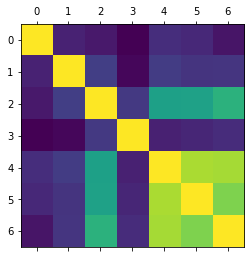

In [ ]:
plt.matshow(corr_df.corr())
plt.show()

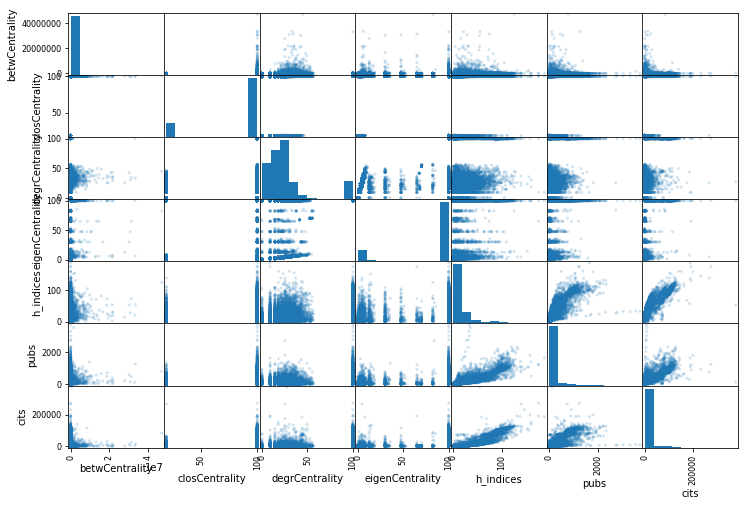

In [ ]:
c = scatter_matrix(corr_df, alpha=0.2, figsize=(12,8))

T-test

In [ ]:
from scipy import stats
from random import sample

In [ ]:
med = median(pubs)

In [ ]:
pubG = [betwCentrality[i] for i in range(len(pubs)) if pubs[i] > med]
pubL = [betwCentrality[i] for i in range(len(pubs)) if pubs[i] < med]

In [ ]:
mean(pubG)

221767.94630837644

In [ ]:
pubG = sample(pubG, 1000)
pubL = sample(pubL, 1000)

In [ ]:
stats.ttest_ind(pubL, pubG)

Ttest_indResult(statistic=-4.179654889674236, pvalue=3.045458183719095e-05)

In [ ]:
np.corrcoef(pubG, pubL)

array([[ 1.        , -0.00654243],
       [-0.00654243,  1.        ]])

## Are community measures good indicators for individual features?

In [ ]:
!pip install cdlib
!pip install angel-cd

In [ ]:
from cdlib import algorithms
from cdlib import *

In [ ]:
biggestSubG = load_obj("biggestSubG")

In [ ]:
lab = algorithms.label_propagation(biggestSubG)

#### Calculating average clustring coefficient and mean of h-index for each community

In [ ]:
h_indices_avg = []
clust_coeffs = []

for community in lab.communities:
  commG = biggestSubG.subgraph(community)

  # h_index
  h_inds = [int(h) for h in commG.vs["h_index"] if h!='']
  h_ind = sum(h_inds)/len(h_inds) if len(h_inds)!= 0 else 0

  h_indices_avg.append(h_ind)

  # clustering coefficient
  clust = commG.transitivity_undirected()
  clust_coeffs.append(clust)

Are there correlations?

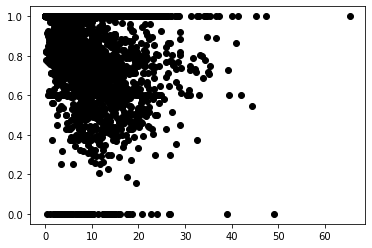

In [ ]:
plt.scatter(h_indices_avg, clust_coeffs, c="black")
plt.savefig('/content/drive/My Drive/NetworkScience/AcademicGraph/data/obj/h_clustering.png')

Degree centrality and h-index

In [ ]:
h_indices_avg = []
degs = []

for community in lab.communities:
  commG = biggestSubG.subgraph(community)

  # h_index
  notnull = [[int(h), mean(commG.degree())] for h in commG.vs["h_index"] if h!='']

  h_ind = mean([el[0] for el in notnull])
  h_indices_avg.append(h_ind)

  deg = mean([el[1] for el in notnull]) 
  degs.append(deg)

In [ ]:
degs = degs[5:]
h_indices_avg = h_indices_avg[5:]

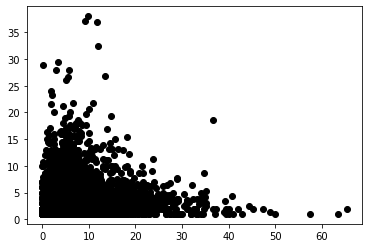

In [ ]:
plt.scatter(h_indices_avg, degs, c="black")
plt.savefig('/content/drive/My Drive/NetworkScience/AcademicGraph/data/obj/h_deg.png')